Appendix A : Data Pre-Processing and visualization

Improting the libraries, reading and cleaning the data and performing initial summary statistics and visualization

Note: While cleaning the data, I'm mainly interested in the 2 columns corresponding to the 2 variables. Therefore, I only check the missing values in these columns!

In [125]:
#importing libraries 

import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
import statistics
import matplotlib.pyplot as plt
import statsmodels.api as statsmodels # useful stats package with regression functions
import seaborn as sns 

from tabulate import tabulate

In [9]:
#importing the dataset and reading it as a dataframe

data = pd.read_csv("https://course-resources.minerva.edu/uploaded_files/mu/00294342-2873/diabetes.csv")  

data.head(10) #showing the first 10 rows of the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Data visualization and descriptive statistics without cleaning the data

In [10]:
print("The sample size = ", len(data)) #print the dataset sample size

The sample size =  768


In [46]:
#get descriptive stats for the 2 variables

data.loc[:,['Glucose', 'BloodPressure']].describe()

,Glucose,BloodPressure
count,767.000000,767.000000
mean,120.859192,69.101695
std,31.978468,19.368155
min,0.000000,0.000000
25%,99.000000,62.000000
50%,117.000000,72.000000
75%,140.000000,80.000000
max,199.000000,122.000000


In [47]:
#get descriptive stats of interest to any variable 

#define the function returing a table of the useful descriptive stats
def descriptive_stats(variable): 
    
    count = len(variable) #sample size
    mean = np.mean(variable)  #sample mean
    median = np.median (variable)  # sample median
    mode = statistics.mode (variable)  #sample mode
    std = np.std (variable, ddof = 1)  #sample standard deviation
    the_range = max(variable) - min(variable)  #sample range
    
    
    #create a table of the descriptive statistics
   
    descriptive_statistics = {
        'count': [count],
        'mean': [round(mean, 3)],   
        'median': [round (median, 3)],
        'mode': [round (mode, 3)],
        'range': [round(the_range, 3)],
        'sample std': [round(std, 3)],
    
    }
    our_table = pd.DataFrame(data= descriptive_statistics)
    return our_table

In [48]:
descriptive_stats(data['Glucose'])

,count,mean,median,mode,range,sample std
0,767,120.859,117.0,100,199,31.978


In [49]:
descriptive_stats(data['BloodPressure'])

,count,mean,median,mode,range,sample std
0,767,69.102,72.0,70,122,19.368


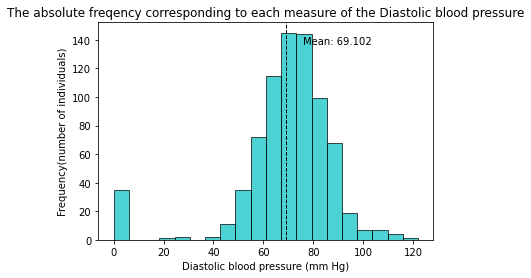

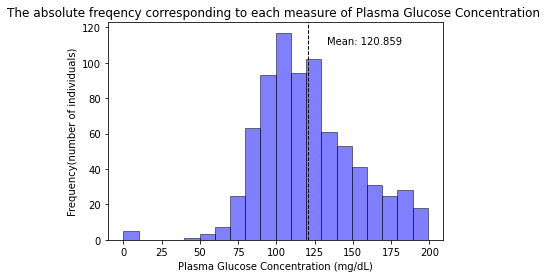

In [58]:
#histogram for the Diastolic blood pressure


plt.hist(data['BloodPressure'], bins = 20, color='c', edgecolor='k', alpha=0.7 )
  
plt.xlabel('Diastolic blood pressure (mm Hg)')
plt.ylabel('Frequency(number of individuals)')

#plotting the line representing the mean
plt.axvline(data['BloodPressure'].mean(), color='k', linestyle='dashed', linewidth=1) 

#adjusting the text 
min_ylim, max_ylim = plt.ylim()
plt.text(data['BloodPressure'].mean()*1.1, max_ylim*0.9,'Mean: {:.3f}'.format(data['BloodPressure'].mean()))

plt.title('The absolute frequency corresponding to each measure of the Diastolic blood pressure')
plt.show()



#histogram for the Plasma Glucose Concentration 

plt.hist(data['Glucose'], bins = 20, color='b', edgecolor='k', alpha=0.5 )
  
plt.xlabel('Plasma Glucose Concentration (mg/dL)')
plt.ylabel('Frequency(number of individuals)')

#plotting the line representing the mean
plt.axvline(data['Glucose'].mean(), color='k', linestyle='dashed', linewidth=1) 

#adjusting the text 
min_ylim, max_ylim = plt.ylim()
plt.text(data['Glucose'].mean()*1.1, max_ylim*0.9,'Mean: {:.3f}'.format(data['Glucose'].mean()))

plt.title('The absolute frequency corresponding to each measure of Plasma Glucose Concentration ')
plt.show()

Data visualization and descriptive statistics after removing the zero values representing non-true outliers



In [50]:
#delete the rows that have value of zero for either the predictor or the reponse variable

new_data = data[(data['Glucose'] > 0) & ((data['BloodPressure'] > 0))] 


#print the new sample size
print("The new sample size = ", len(new_data))


The new sample size =  727


In [51]:
#get descriptive stats for the 2 variables

new_data.loc[:,['Glucose', 'BloodPressure']].describe()

,Glucose,BloodPressure
count,727.000000,727.000000
mean,121.837689,72.438790
std,30.684991,12.394626
min,44.000000,24.000000
25%,100.000000,64.000000
50%,117.000000,72.000000
75%,141.000000,80.000000
max,199.000000,122.000000


In [52]:
descriptive_stats(new_data['Glucose'])

,count,mean,median,mode,range,sample std
0,727,121.838,117.0,100,155,30.685


In [53]:
descriptive_stats(new_data['BloodPressure'])

,count,mean,median,mode,range,sample std
0,727,72.439,72.0,70,98,12.395


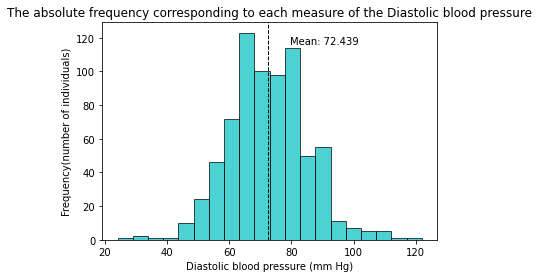

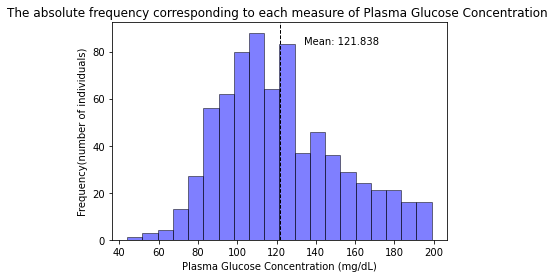

In [200]:
#histogram for the Diastolic blood pressure


plt.hist(new_data['BloodPressure'], bins = 20, color='c', edgecolor='k', alpha=0.7 )
  
plt.xlabel('Diastolic blood pressure (mm Hg)')
plt.ylabel('Frequency(number of individuals)')

#plotting the line representing the mean
plt.axvline(new_data['BloodPressure'].mean(), color='k', linestyle='dashed', linewidth=1) 

#adjusting the text 
min_ylim, max_ylim = plt.ylim()
plt.text(new_data['BloodPressure'].mean()*1.1, max_ylim*0.9,'Mean: {:.3f}'.format(new_data['BloodPressure'].mean()))

plt.title('The absolute frequency corresponding to each measure of the Diastolic blood pressure')
plt.show()



#histogram for the Plasma Glucose Concentration 

plt.hist(new_data['Glucose'], bins = 20, color='b', edgecolor='k', alpha=0.5 )
  
plt.xlabel('Plasma Glucose Concentration (mg/dL)')
plt.ylabel('Frequency(number of individuals)')

#plotting the line representing the mean
plt.axvline(new_data['Glucose'].mean(), color='k', linestyle='dashed', linewidth=1) 

#adjusting the text 
min_ylim, max_ylim = plt.ylim()
plt.text(new_data['Glucose'].mean()*1.1, max_ylim*0.9,'Mean: {:.3f}'.format(new_data['Glucose'].mean()))

plt.title('The absolute frequency corresponding to each measure of Plasma Glucose Concentration ')
plt.show()

Appendix B : Correlation Analysis

In [118]:
#get pearson's r via calculating the standard units

def pearson_r (column_a, column_b):
    
    list_var1 = new_data[column_a].tolist()
    list_var2 = new_data[column_b].tolist()
    
    # the mean for both x and y variables
    mean_x = np.mean(list_var1)
    mean_y = np.mean(list_var2)
    
    # the standard deviation for both x and y variables
    sd_x = np.std(list_var1)
    sd_y = np.std(list_var2)
       
    #convert to standard units
    product = []
    for i in range(len(list_var1)):
        var1_sd = (list_var1[i] - mean_x)/ sd_x
        var2_sd = (list_var2[i] - mean_y)/ sd_y
        product.append (var1_sd * var2_sd)  
        
    r_value = sum(product) / len(product)
    
    return round (r_value , 3)



In [119]:
#call the function to return the correlation coefficient
pearson_r ('Glucose', 'BloodPressure')

0.223

In [186]:
#get pearson's r via .corr() method and make a scatter plot for two variables

def corr_scatter(column_a, column_b):
    print("\nThe pearson's r value comparing", [column_a] , "to", [column_b] , "is:",round(new_data[column_a].corr(new_data[column_b]),3))
    sns.regplot(x= column_a, y= column_b, data=new_data, marker="+", x_jitter=.25, y_jitter=.25, color= 'b') # jitter is added to offset data points that are potentially overlapping due to discreteness.
    
    



The pearson's r value comparing ['Glucose'] to ['BloodPressure'] is: 0.223


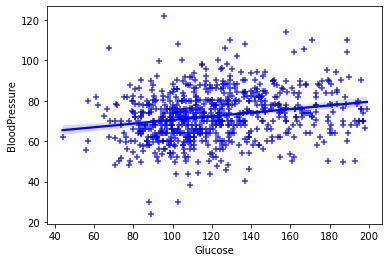

In [187]:
#call the function to return the correlation coefficient  
corr_scatter('Glucose' , 'BloodPressure')

Appendix C : Constructing the Regression Model & Conditions check for the least squares line

In [202]:
#simple linear regression

def regression_model(column_x, column_y):
    
    # this function creates a scatter plot, plots of the residuals, compute R-squared, and display the regression equation

    # fit the regression line using "statsmodels" library:
    X = statsmodels.add_constant(new_data[column_x])
    Y = new_data[column_y]
    regressionmodel = statsmodels.OLS(Y,X).fit() #OLS stands for "ordinary least squares"

    # extract regression parameters from model, rounded to 3 decimal places
    Rsquared = round(regressionmodel.rsquared,3)
    slope = round(regressionmodel.params[1],3)
    intercept = round(regressionmodel.params[0],3)

    # make plots
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(12,4))
    sns.regplot(x=column_x, y=column_y, data=new_data, marker="+", ax=ax1) # plot data and a linear regression model fit
    
    # Set x-axis and y-axis labels

    ax1.set(xlabel = 'Plasma Glucose Concentration (mg/dL)', ylabel='Diastolic blood pressure (mm Hg)')
    
    sns.residplot(x=column_x, y=column_y, data=new_data, ax=ax2) # residual plot
    ax2.set(ylabel='Residuals')
    ax2.set_ylim(min(regressionmodel.resid)-1,max(regressionmodel.resid)+1)
    

  
    
    plt.figure() # histogram
    sns.distplot(regressionmodel.resid, kde=True, axlabel='Residuals', color='red') # histogram


             # QQ plot
    qqplot = statsmodels.qqplot(regressionmodel.resid,fit=True,line='45')
    qqplot.suptitle("Normal Probability (\"QQ\") Plot for Residuals",fontweight='bold',fontsize=14)
    

    # print the model results
    print("R-squared = ",Rsquared)
    print("Regression equation: "+column_y+" = ",slope,"* "+column_x+ " + ",intercept)

/Users/rwankhalifa/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


R-squared =  0.05
Regression equation: BloodPressure =  0.09 * Glucose +  61.447


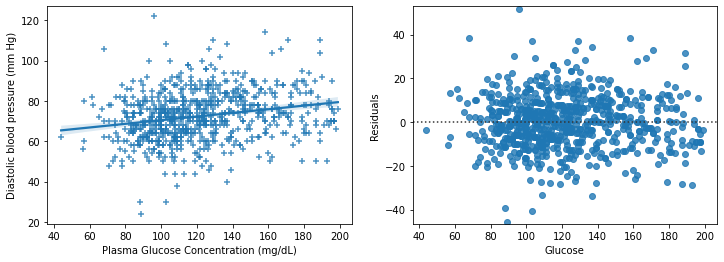

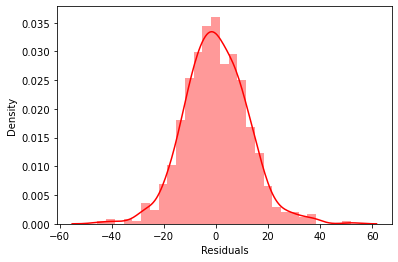

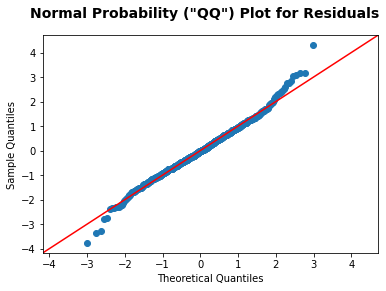

In [203]:
#call the function to display the plots, R-squared and the regression equation
regression_model('Glucose', 'BloodPressure')

In [190]:
#regression manually


def regression(column_a, column_b):
    
    
    x = new_data[column_a]
    y = new_data[column_b]
    
    #add constant to predictor variables
    x = statsmodels.add_constant(x)

    #fit linear regression model
    model = statsmodels.OLS(y, x).fit()
    
    y_pred = model.predict(x)
    df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
  

    
    #calculate SSE
    sse = np.sum(np.square(df['Predicted'] - df['Actual']))


    #calculate SSR
    ssr = np.sum(np.square(df['Predicted'] - y.mean()))
    
    
    #calculate SST
    sst = ssr + sse
    
    #calculate r_squared
    r_sqr =  round (ssr/sst , 4)
    
    return r_sqr

In [191]:
#call the function to return the coefficient of determination (R_squared)
regression('Glucose', 'BloodPressure')

0.0499

In [67]:
#check the sample observations are independent

pop_size = 10070       #population size

def is_independent(sample, population):
    
    #sample size
    n = len(sample)
    
    #ratio of the sample size to the population size
    ratio = n / population
    
    if ratio <= 0.1:
        
        print ("Since the the sample size represents ", round (ratio, 3)*100 , " % of the population, it's independent")
        return True
    else:
        
        print ("Since the the sample size represents ", round (ratio, 3)*100 , " % of the population, it's not independent")
        return False

In [68]:
#calling the function returning whether the sample observations are independent or not
is_independent(new_data,pop_size)

Since the the sample size represents  7.199999999999999  % of the population, it's independent


True

Appendix D: Significance and confidence interval

In [192]:
#defining a function to get summary information about the model 
#including the equation coefficients, R_squared, P-value , t-score and confidence intervals

def regression_results(X, Y):
    
    X = statsmodels.add_constant(X) # if excluded, the intercept would be 0
    model = statsmodels.OLS(Y, X).fit()
    return model.summary() #To get detailed information about the model, using .summary() method



In [193]:
#calling the function to get model's summary information
regression_results(new_data['Glucose'], new_data['BloodPressure'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          BloodPressure   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     38.06
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           1.14e-09
Time:                        20:07:40   Log-Likelihood:                -2842.5
No. Observations:                 727   AIC:                             5689.
Df Residuals:                     725   BIC:                             5698.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.4471      1.837     33.447      0.000      57.840      65.054
Glucose        0.0902      0.015      6.170      0.000       0.062       0.119
==============================================================================
Omnibus:                       17.056   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.939
Skew:                           0.135   Prob(JB):                     3.15e-07
Kurtosis:                       3.957   Cond. No.                         515.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [198]:
#Calculating the model's summery information without statsmodels library (with the formulas)

def significance(predictor, response, tails):
    
    #calculte pearson's correlation coefficient
    r = new_data[predictor].corr(new_data[response])
    print ("Pearson's r =" , r)
    
    #2 variables means
    x_bar = np.mean(new_data[predictor])
    y_bar = np.mean(new_data[response])
    
    #2 variables standard deviation
    sx = np.std(new_data[predictor], ddof =1)  #Bassel's correction applied(dealing with the sample not the population)
    sy = np.std(new_data[response], ddof =1)
    
    
    #sample size
    n = len(new_data) 
    
    #the point-estimate for the slope
    b1 = (sy/sx) * r 
    print("b1 =", b1)
    
    #standard error 
    SE = (sy/sx)*((1-r**2)/ (n-2))**0.5  
    print("SE =",SE)
    
    #t-score based on the observed slope value
    t = b1 / SE  
    print("T score =",t)
    
    
    # t-score for the 95% confidence level (to be used in the confidence interval)
    t_value =  stats.t.ppf(0.975,n-2)  
    
    #calculate the upper and lowe bound for the confidence interval
    lower_bound = b1 - t_value*SE
    upper_bound = b1 + t_value*SE
    


    print("Slope's confidence interval =", [lower_bound,upper_bound])

    print ("P-value =" , (1 - stats.t.cdf(t, n-2))*tails)
    
    

In [199]:
#calling the function to get the model's summery information
significance('Glucose', 'BloodPressure', 1)

Pearson's r = 0.22334504843722952
b1 = 0.090216040780694
SE = 0.014622679923726819
T score = 6.169596903663952
Slope's confidence interval = [0.06150818930840929, 0.11892389225297872]
P-value = 5.689727577973258e-10
